In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [6]:
img_width = 200
img_height = 200

train_data_dir = 'C:/Users/HP/Downloads/Benign_Malignant/Benign_Malignant/Data/Train'
validation_data_dir = 'C:/Users/HP/Downloads/Benign_Malignant/Benign_Malignant/Data/Validation'
train_samples = 200
validation_samples = 200
epochs = 50
batch_size = 50

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 activation (Activation)     (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 97, 97, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                   

In [9]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(traning_data)
    np.save('train_data.npy', traning_data)
    return training__data

In [10]:
import tensorflow.keras
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 400 images belonging to 2 classes.


In [10]:
print(train_generator.class_indices)

{'Benign': 0, 'Malignant': 1}


In [11]:
imgs, labels = next(train_generator)

In [12]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

50
0.0


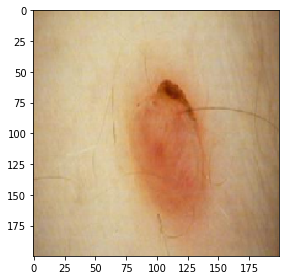

0.0


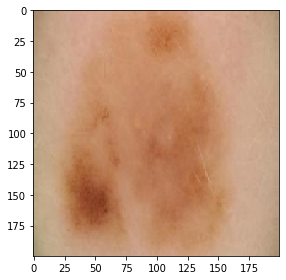

0.0


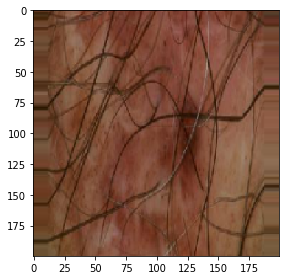

1.0


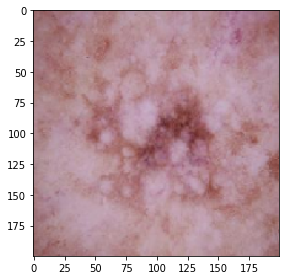

1.0


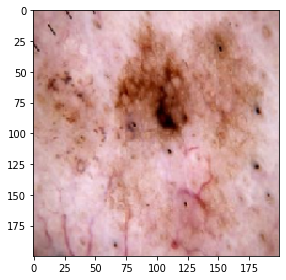

0.0


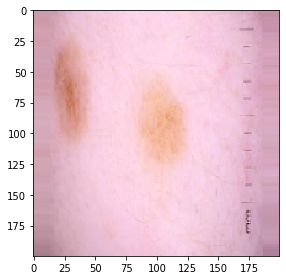

1.0


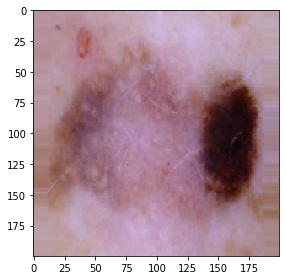

1.0


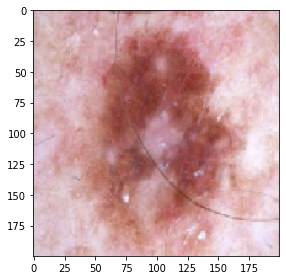

0.0


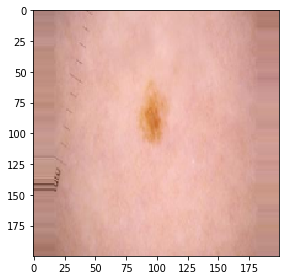

1.0


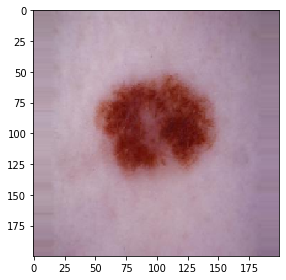

0.0


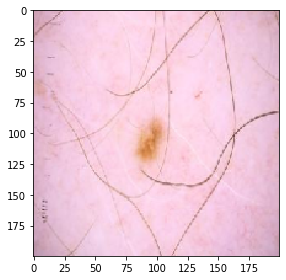

0.0


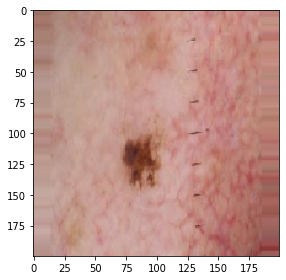

1.0


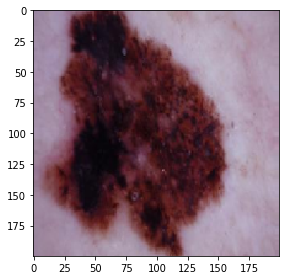

0.0


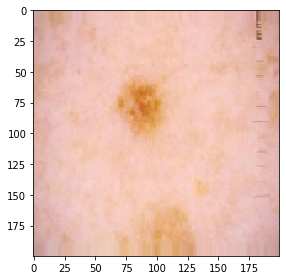

0.0


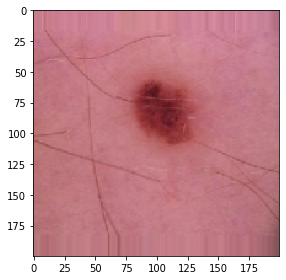

0.0


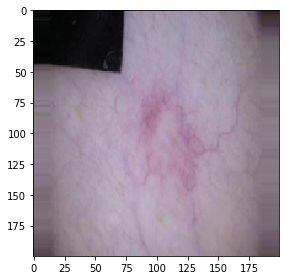

1.0


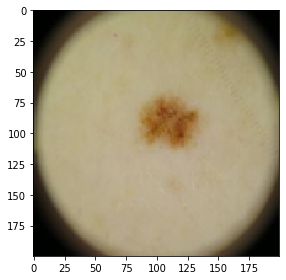

0.0


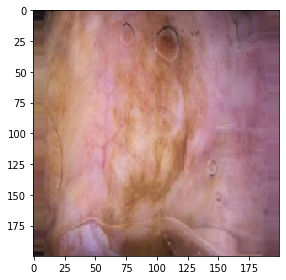

1.0


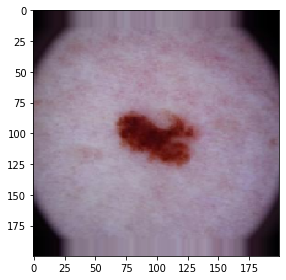

0.0


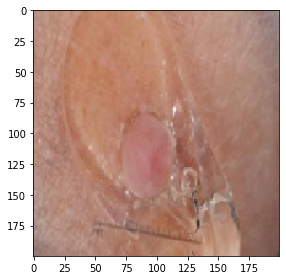

0.0


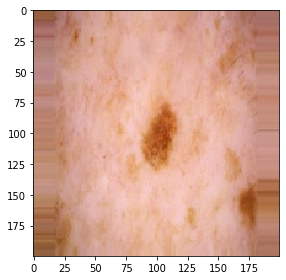

1.0


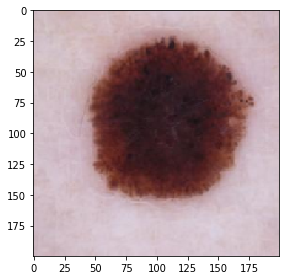

0.0


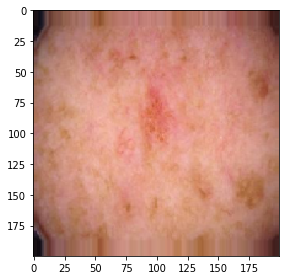

1.0


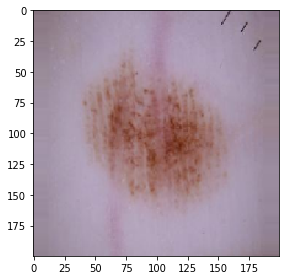

1.0


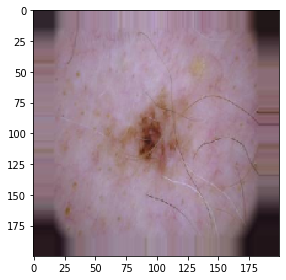

0.0


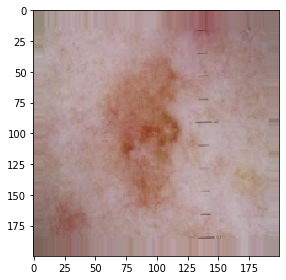

1.0


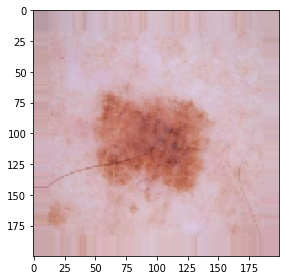

0.0


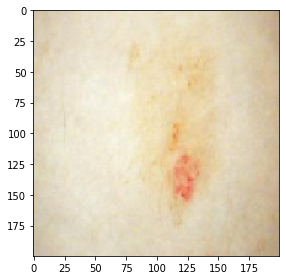

1.0


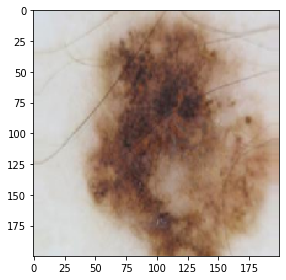

0.0


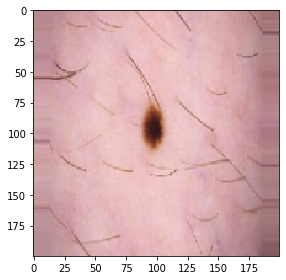

0.0


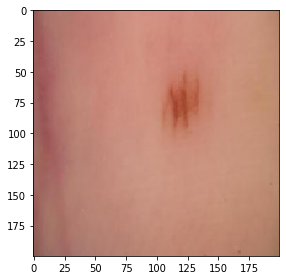

0.0


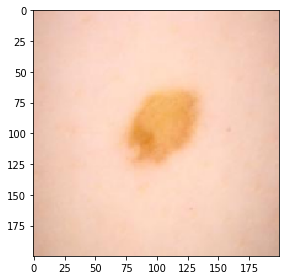

0.0


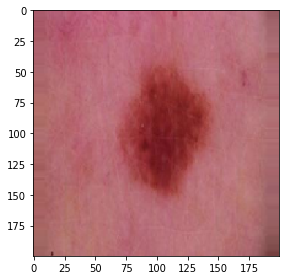

1.0


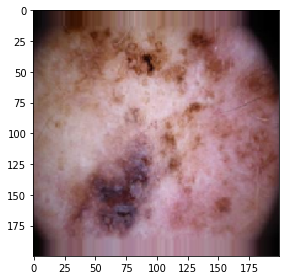

0.0


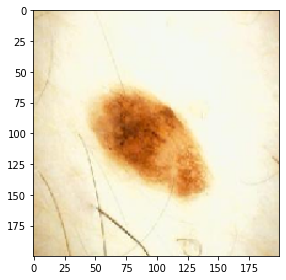

0.0


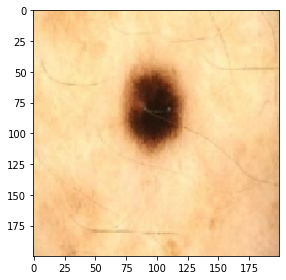

1.0


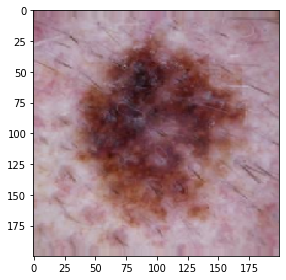

0.0


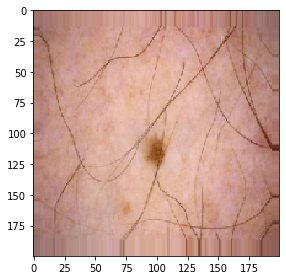

0.0


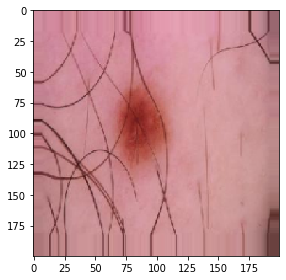

0.0


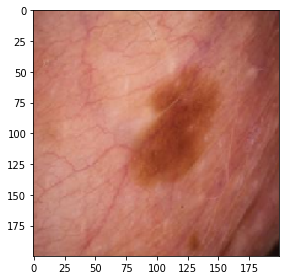

1.0


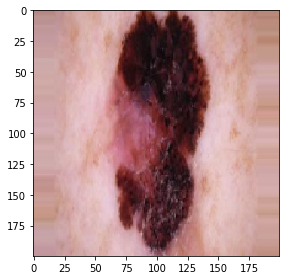

0.0


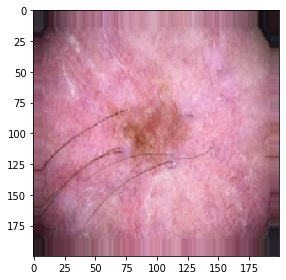

0.0


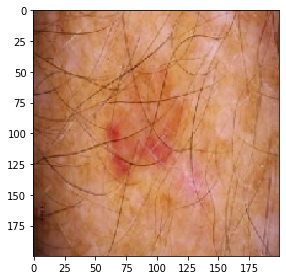

0.0


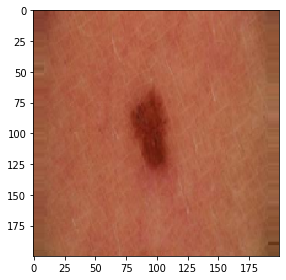

0.0


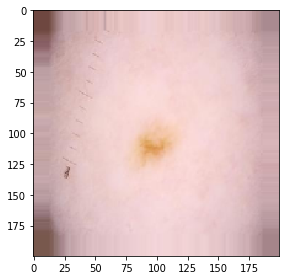

0.0


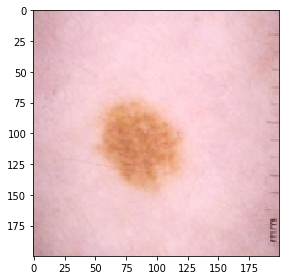

1.0


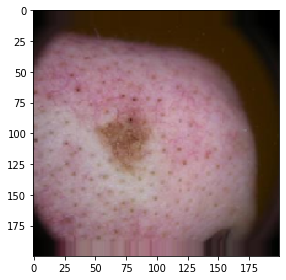

0.0


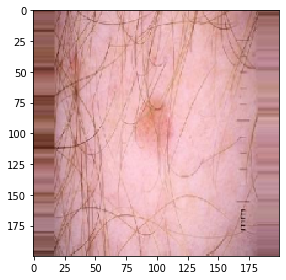

1.0


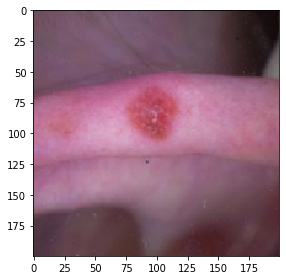

1.0


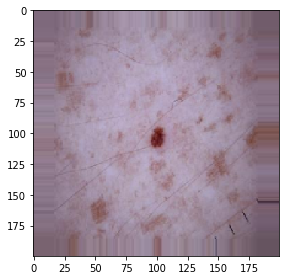

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [16]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 400 images belonging to 2 classes.


In [17]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

c:\users\pares\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 0.6769 - accuracy: 0.5950 - val_loss: 0.6942 - val_accuracy: 0.5150
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 0.7168 - accuracy: 0.4750 - val_loss: 0.6917 - val_accuracy: 0.4950
Epoch 3/50
4/4 [==============================] - 7s 2s/step - loss: 0.6905 - accuracy: 0.5850 - val_loss: 0.6821 - val_accuracy: 0.5450
Epoch 4/50
4/4 [==============================] - 6s 2s/step - loss: 0.6803 - accuracy: 0.5950 - val_loss: 0.6765 - val_accuracy: 0.7600
Epoch 5/50
4/4 [==============================] - 6s 2s/step - loss: 0.6590 - accuracy: 0.6500 - val_loss: 0.6642 - val_accuracy: 0.6250
Epoch 6/50
4/4 [==============================] - 6s 2s/step - loss: 0.6763 - accuracy: 0.6150 - val_loss: 0.6628 - val_accuracy: 0.5800
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.6537 - accuracy: 0.6550 - val_loss: 0.6465 - val_accuracy: 0.7050
Epoch 8/50
4/4 [=========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


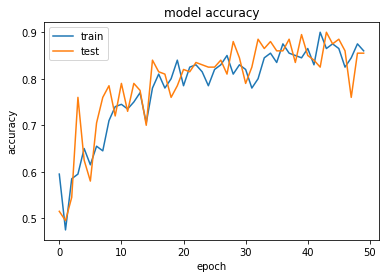

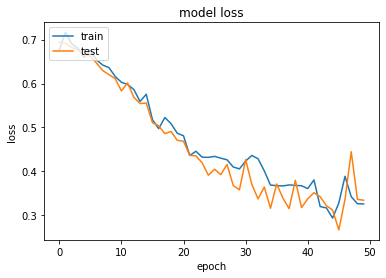

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:

from tensorflow.keras.models import load_model

model.save('SKin_Cancer_cnn.h5')

cnn = load_model('SKin_Cancer_cnn.h5')

In [20]:
from tensorflow.keras.models import load_model



model = load_model('SKin_Cancer_cnn.h5')

In [39]:
predict_dir_path='C:/Users/pares/Desktop/23-07-22/archive/Data/Test'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['Benign (1).jpg', 'Benign (2).jpg', 'Benign (3).jpg', 'Benign (4).jpg', 'Benign (5).jpg', 'melanoma_10136.jpg', 'melanoma_5033.jpg', 'melanoma_5044.jpg']


In [40]:
# predicting images
from tensorflow.keras.preprocessing import image
Benign_Image = 0
Malignant_Image  = 0

actual  = [0,0,0,0,0,1,1,1]
predicted  = []

for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'Benign')
        Benign_Image += 1
        predicted.append(0)
    else:
        print(file + ": " + 'Malignant')
        Malignant_Image += 1
        predicted.append(1)
print("Total Benign Images :",Benign_Image)
print("Total Malignant Images :",Malignant_Image)
print("actual :",actual)
print("predicted :",predicted)

1/1 [==============================] - 0s 50ms/step
Benign (1).jpg: Benign
1/1 [==============================] - 0s 46ms/step
Benign (2).jpg: Benign
1/1 [==============================] - 0s 25ms/step
Benign (3).jpg: Benign
1/1 [==============================] - 0s 37ms/step
Benign (4).jpg: Benign
1/1 [==============================] - 0s 25ms/step
Benign (5).jpg: Benign
1/1 [==============================] - 0s 23ms/step
melanoma_10136.jpg: Malignant
1/1 [==============================] - 0s 27ms/step
melanoma_5033.jpg: Malignant
1/1 [==============================] - 0s 28ms/step
melanoma_5044.jpg: Malignant
Total Benign Images : 5
Total Malignant Images : 3
actual : [0, 0, 0, 0, 0, 1, 1, 1]
predicted : [0, 0, 0, 0, 0, 1, 1, 1]


In [41]:

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[3 0]
 [0 5]]


In [42]:
TP, FP, FN, TN = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', TP, FP, FN, TN)

Outcome values : 
 3 0 0 5


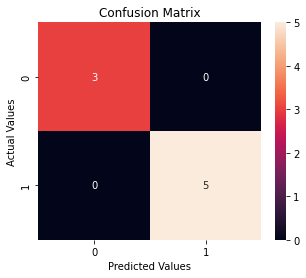

In [43]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()